In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identity metrics

In [3]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line/identity_ood_metrics_encoded_BXCP3.csv",
                              index_col=0)

In [4]:
identity_metrics.mean(1)

r_squared            0.958054
sinkhorn_div_1      12.194404
sinkhorn_div_10      3.921369
sinkhorn_div_100     2.387238
e_distance           4.607658
mmd                  0.011896
dtype: float64

CellFlow

In [5]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line/cellflow_ood_metrics_encoded_BXCP3.csv",
                              index_col=0)

In [6]:
cellflow_metrics.mean(1)

r_squared             0.166714
sinkhorn_div_1       64.329714
sinkhorn_div_10      56.612194
sinkhorn_div_100     53.518740
e_distance          106.213280
mmd                   0.200858
dtype: float64

Metrics

In [7]:
# mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line/",
#                               index_col=0)

In [8]:
# mean_metrics.mean(1)

## Get gene list by distance from the controls 

In [9]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line/identity_ood_metrics_deg_BXCP3.csv",
                              index_col=0)

In [10]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [11]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

# Plot comparisons

In [12]:
merged = pd.concat([identity_metrics, cellflow_metrics], axis=1).T

In [13]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [14]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])
merged["Perturbation effect"] = perturbation_cat

In [15]:
pathways = []
cell_lines = []

for cat in merged.index:
    cell_line, pathway, _ = cat.split("_")
    pathways.append(pathway)
    cell_lines.append(cell_line)

In [16]:
# merged["pathway"] = pathways
# merged["cell_line"] = cell_lines
# merged = merged.loc[merged.pathway=="IFNG"]

In [17]:
merged

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,Model,Perturbation effect
BXPC3_IFNB_ADAR,0.778514,35.212929,24.468189,20.047997,38.953534,0.070387,Identity,0
BXPC3_IFNB_AKT1,0.996310,8.983570,1.288403,0.289429,0.494715,0.003025,Identity,4
BXPC3_IFNB_BATF2,0.998029,9.946981,1.659523,0.205578,0.286922,0.003486,Identity,3
BXPC3_IFNB_BRD9,0.959877,11.900391,3.468056,2.336903,4.575329,0.012411,Identity,1
BXPC3_IFNB_CEBPB,0.969533,12.986256,3.674145,1.853039,3.596919,0.010829,Identity,1
...,...,...,...,...,...,...,...,...
BXPC3_TNFA_TRAF1,0.247733,69.612015,62.722889,58.910526,116.423409,0.223797,cellFlow,1
BXPC3_TNFA_TRAF2,0.247529,71.636131,64.639862,60.236717,119.060758,0.229399,cellFlow,3
BXPC3_TNFA_TRAF3,0.250786,70.709015,64.001450,60.697273,120.242102,0.230499,cellFlow,4
BXPC3_TNFA_ZFP36L1,0.265770,63.898125,56.387066,51.365795,100.774728,0.201678,cellFlow,4


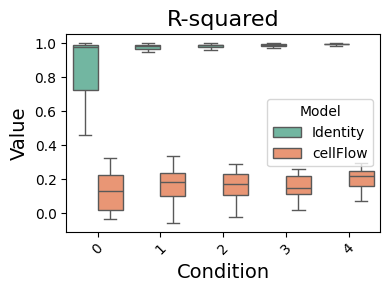

In [18]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

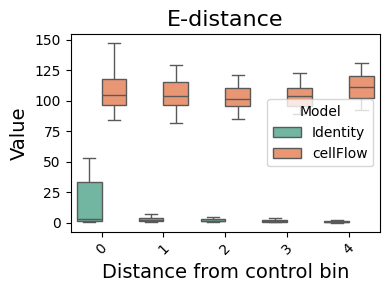

In [19]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

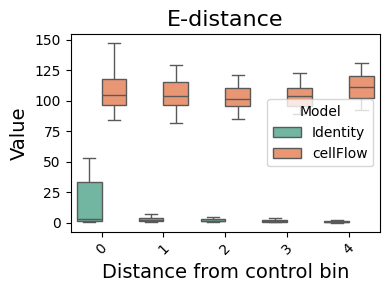

In [20]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [24]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [23]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
s